# Projeto 1 - Ciência dos Dados

Nome: Roberto Schnorrenberg

## Pergunta (s) a ser respondida

Os países que se integraram ao OCDE (Organização para Cooperação e Desenvolvimento Econômico) aumentaram o número de bilionários e dimínuiram o número de suicídios em suas províncias relacionados aos países de fora do bloco?

## Explicação da hipótese e mecanismo

Atualmente a OCDE é uma organização internacional com o objetivo de fomentar e incentivar ações de desenvolvimento econômico de seus países, além de medidas que visem à ampliação de metas para o equilíbrio econômico mundial e melhorem as condições de vida e os índices de renda e emprego.

Portanto, com a diminuição do desemprego e a melhora das condições de vida em geral há uma hipótese de que o número de bilionários aumente e o número de suicídos diminua nos países participantes do bloco.

Diante disso, os dados de renda nacional líquida per capita e o índice de desemprego serão observados para propor uma correlação ao número de bilionários e suicídios de países de dentro e fora do bloco no ano de 2005, explicitando, se houver, alguma diferença entre os dados dos integrantes e não integrantes da organização internacional. Já que é comum imaginar que um país com  melhores condições de vida e um pequeno índice de desemprego acaba gerando uma diminuição no número de suicídios ou no aumento de bilionários do país. Logo, esse projeto tem como função esclarecer a relação desses dados.

Como referência para transpor tal hipótese segue os estudos dos sites: 
- https://www.bbc.com/portuguese/geral-48890430(https://www.insper.edu.br/biblioteca-telles/recursos-de-busca/)
- https://academic.oup.com/icc/article/22/1/313/885637 
- http://econtent.hogrefe.com/doi/pdf/10.1027/0227-5910.26.3.104

## Bases de dados usadas

link para o site de download das bases de dados = https://www.gapminder.org/data/ 

Foram coletados os seguintes dados:

- Renda nacional líquida ajustada per capita
- Ìndice de desemprego de indivíduos acima de 15 anos
- Índice de bilionários
- Número de suicídios



# Arquivos e índices necessários

In [334]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')

In [335]:
renda=pd.read_excel('renda_certa.xlsx')
desemprego=pd.read_excel('aged_15plus_unemployment_rate_percent.xlsx')
bilionarios=pd.read_excel('dollar_billionaires.xlsx')
suicidios=pd.read_excel('suicidio.xlsx')

# Renda

Os dados em questão representam a renda dos países em 2005.

In [336]:
renda_2005 = renda.loc[:, ["country", 2005]]
renda_2005.head()

,country,2005
0,Afghanistan,NaN
1,Albania,2500.0
2,Algeria,2060.0
3,Angola,564.0
4,Argentina,3790.0


# Desemprego

Os dados em questão representam o índice de desemprego dos países em 2005.

In [337]:
desemprego_2005 = desemprego.loc[:,['country', 2005]]
desemprego_2005.head()

,country,2005
0,Afghanistan,NaN
1,Albania,NaN
2,Algeria,15.3
3,Angola,NaN
4,Antigua and Barbuda,NaN


# Bilionários 

Os dados em questão representam o índice de bilionários dos países em 2005.

In [338]:
bilionarios_2005 = bilionarios.loc[:,['country', 2005]] 
bilionarios_2005.head()

,country,2005
0,Afghanistan,0.0
1,Albania,0.0
2,Algeria,0.0
3,Andorra,0.0
4,Angola,0.0


# Suicídios

Os dados em questão representam o número de suicídios dos países em 2005.

In [339]:
suicidios_2005 = suicidios.loc[:,['country', 2005]]
suicidios_2005.head()

,country,2005
0,Afghanistan,1600.00
1,Albania,204.00
2,Algeria,1210.00
3,Andorra,7.04
4,Angola,980.00


# Join

Unindo os quatro dados coletados em uma unica tabela.

In [340]:
renda_idx = renda_2005.set_index('country')

In [341]:
desemprego_idx = desemprego_2005.set_index('country')

In [342]:
bilionarios_idx = bilionarios_2005.set_index('country')

In [343]:
suicidios_idx = suicidios_2005.set_index('country')

In [344]:
renda_desemprego = renda_idx.join(desemprego_idx, how='inner', lsuffix='_renda', rsuffix='_dspg')
renda_desemprego.head()

,2005_renda,2005_dspg
country,,
Afghanistan,NaN,NaN
Albania,2500.0,NaN
Algeria,2060.0,15.3
Angola,564.0,NaN
Argentina,3790.0,11.5


In [345]:
bili_sui = bilionarios_idx.join(suicidios_idx, how='inner', lsuffix='_bln', rsuffix='_scd')
bili_sui.head()

,2005_bln,2005_scd
country,,
Afghanistan,0.0,1600.00
Albania,0.0,204.00
Algeria,0.0,1210.00
Andorra,0.0,7.04
Angola,0.0,980.00


In [346]:
tab = renda_desemprego.join(bili_sui, how='inner')
tab.head()

,2005_renda,2005_dspg,2005_bln,2005_scd
country,,,,
Afghanistan,NaN,NaN,0.0000,1600.0
Albania,2500.0,NaN,0.0000,204.0
Algeria,2060.0,15.3,0.0000,1210.0
Angola,564.0,NaN,0.0000,980.0
Argentina,3790.0,11.5,0.0253,4470.0


# Criando a  variável dos integrantes da OCDE

Para a análise da hipótese em pauta é necessário a criação da variável dos integrantes da OCDE para iniciar as relações que darão significado a conclusão final.

In [347]:
tab['OCDE']='excluso'
lista_OCDE=['Germany','Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'South Korea', 'Denmark', 'Slovenia', 'Spain', 'United States', 'Estonia', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Luxembourg', 'Mexico', 'Norway', 'New Zealand', 'Netherlands', 'Peru', 'Poland', 'Portugal', 'United Kingdom']
tab.loc[lista_OCDE, 'OCDE']='incluso'
tab.head()

,2005_renda,2005_dspg,2005_bln,2005_scd,OCDE
country,,,,,
Afghanistan,NaN,NaN,0.0000,1600.0,excluso
Albania,2500.0,NaN,0.0000,204.0,excluso
Algeria,2060.0,15.3,0.0000,1210.0,excluso
Angola,564.0,NaN,0.0000,980.0,excluso
Argentina,3790.0,11.5,0.0253,4470.0,excluso


# Análise de suicídios

Aqui se encontra o histograma e o boxplot do número de suicídios no ano de 2005

Text(0.5, 0, 'Suicídios')

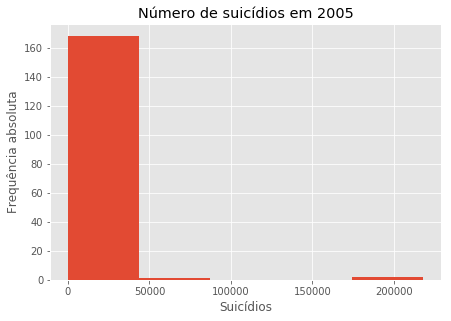

In [354]:

fig = plt.figure(figsize=(7,16))
plt.subplot(311)
plot = tab['2005_scd'].plot.hist(bins=5, title='Número de suicídios em 2005', alpha=1)
plt.ylabel('Frequência absoluta')
plt.xlabel('Suicídios')

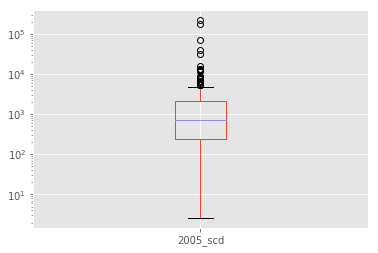

In [355]:
tab.loc[:,'2005_scd'].plot.box(logy=True)

**Análise dos gráficos:**

Observando o boxplot e o histograma é possivel observar no histrama uma alta assimetria a direita, isso ocasionado por um alto número de suicídios decorrentes dos países Rússia, China e Índia. O que será levado em conta mais a frente no documento

# PARÂMETROS

Estipulação de parametros para a melhor visualização dos gráficos realizados.

In [356]:

def parametros(tab_x,tab_y,nx='eixo x',ny= 'eixo y'):    
    t=tab_y.cov(tab_x)/ tab_x.var()
    k=tab_y.mean() -t*tab_x.mean()


    f = plt.figure(figsize=(7, 5))
    plt.scatter(tab_x, tab_y, c='red', alpha=1)
    plt.title(nx + ' versus '+ ny)
    plt.xlabel(nx)
    plt.ylabel(ny)

    plt.plot((tab_x.min(), tabx.max()), (t*tab_x.min()+k, t*tab_x.max()+k), color='red')

    plt.tight_layout()
    plt.show()

# Correlação entre a renda e os bilionários

C:\Users\Roberto\.anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


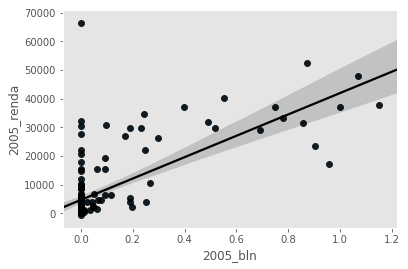

In [357]:
tab.plot.scatter(x='2005_bln',y='2005_renda');
sns.regplot(tab["2005_bln"],tab["2005_renda"], color=('black'))
plt.grid()


In [419]:

print('A correlação entre a renda em 2005 e a o índice de bilionários em 2005 é:', tab['2005_renda'].corr(tab['2005_bln']))
tab.loc[:,["2005_bln", "2005_renda"]].corr()

A correlação entre a renda em 2005 e a o índice de bilionários em 2005 é: 0.6990251329296182


,2005_bln,2005_renda
2005_bln,1.000000,0.699025
2005_renda,0.699025,1.000000


##### **conclusão sobre a correlação:** 

Observando o gráfico da correlação da renda e do número de bilonários no ano de 2005 é possível observar que a hipótese defendida sobre o aumento do número de bilionários de um país decorrente de uma renda alta no própio país é coerente, já que a correlação observada é alta e positiva (0.6990251329296182), explicitando que um país com uma renda alta tende a possuir um maior númeoro de bilionários.

# Correlação entre a renda e os suicídios

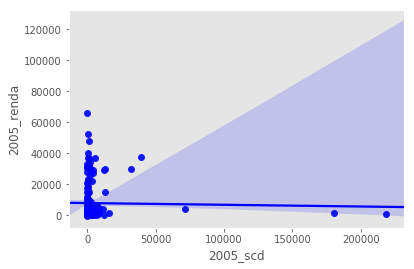

In [359]:
tab.plot.scatter(x='2005_scd',y='2005_renda');
sns.regplot(tab["2005_scd"],tab["2005_renda"], color=('blue'))

plt.grid()


**conclusão sobre a correlação:**

Diante do gráfico apresentado podemos observar que a correlação é negativa muito baixa se aproximando quase de zero, porém isso ocorre pelo fato da presença da China, Índia e Rússia que possuem números extremamente altos de suicídios e induzem a correlação a ficar negativa. No entanto, não é essa a real natureza do número de suicídios diante dos outros países, além disso não fazem parte da OCDE, portanto se retirarmos esses países do gráfico teremos uma correlação mais coerente com os países da organização, por isso, da retirada desses países.

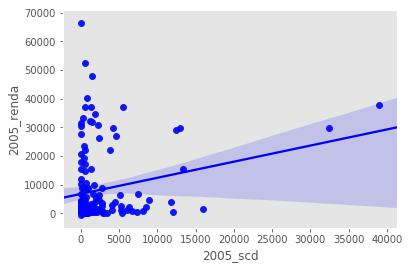

In [360]:
tab_sem_cir= tab[tab['2005_scd'] <= 50000]
tab_sem_cir.plot.scatter(x="2005_scd",y='2005_renda');
sns.regplot(tab_sem_cir["2005_scd"],tab_sem_cir["2005_renda"], color=('blue'))
plt.grid()

In [420]:
print('A correlação entre o a renda em 2005 e o número de suicídios em 2005 é:', tab['2005_renda'].corr(tab['2005_scd']))
tab.loc[:,["2005_scd", "2005_renda"]].corr()

A correlação entre o a renda em 2005 e o número de suicídios em 2005 é: -0.02064468874622713


,2005_scd,2005_renda
2005_scd,1.000000,-0.020645
2005_renda,-0.020645,1.000000


**conclusão sobre a correlação:**

Após retirar a China, a Rússia e a Índia observa-se que a correlaçao passou de negativa para positiva deixando claro que há uma alta correlação onde o aumento na renda dos países também aumenta o número de suicídios desses países.

Contrapondo a hipótese de que com uma paíse onde a renda é alta o número de suicídios deveria diminuir porém com a análise desses dados é possível concluir que essa hipótese está um tanto quanto equivocada e que os suicídios não possuem essa relação, mas possuem a relação contrária, ou seja, quanto mais renda há no país mais suicídios ocorrem.

# Correlação entre o desemprego e os bilionários

Correlacionando a taxa de desemprego em 2005 e o número de bilionários em 2005 temos: -0.20024259579758483


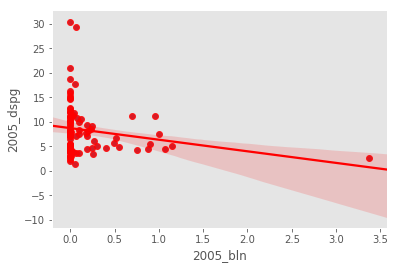

In [362]:
tab.plot.scatter(x='2005_bln',y='2005_dspg');
sns.regplot(tab["2005_bln"],tab["2005_dspg"], color=('red'))

plt.grid()
print('Correlacionando a taxa de desemprego em 2005 e o número de bilionários em 2005 temos:', tab['2005_dspg'].corr(tab['2005_bln']))

**conclusão sobre a correlação:**

Na correlação entre o desemprego e os bilionários dos países em 2005, é possível concluir que com a diminuição de desemprego o número de bilionários aumenta, levando em conta a hipótese abordada no início do documento que pautava a questão de que quanto menos desemprego maior seriam os bilionários é possivel dizer que é adequada ao países em 2005.

# Correlação entre o desemprego e os suicídios

Correlacionando a taxa de desemprego em 2005 e o número de suicídios em 2005 temos: -0.15576692485057295


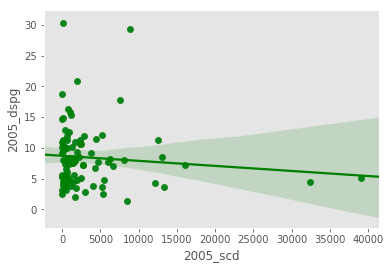

In [363]:
tab2_sem_cir=tab[tab['2005_scd'] <= 50000]
tab2_sem_cir.plot.scatter(x='2005_scd',y='2005_dspg');
sns.regplot(tab2_sem_cir["2005_scd"],tab2_sem_cir["2005_dspg"], color=('green'))

plt.grid()
print('Correlacionando a taxa de desemprego em 2005 e o número de suicídios em 2005 temos:', tab['2005_dspg'].corr(tab['2005_scd']))

**conclusão sobre a correlação**

Relembrando que a análise do número de suicídios ainda não possui os dados da Índia, Rússia e China para uma correlação mais condizente com os países análisados, porém neste caso a retirada desses países não alterou considerávelmente a correlação entre o desemprego e o número de suicídios.

Esta correlação se manteve negativa indo contra a hipótese inicial de que um países com pouco índice de desemprego teriam menos suicídios, no entanto observa-se que não há uma relação muito concreta sobre essa correlação, mas a princípio quanto menos desemprego maior a o número de suicídios. 

# Criação de uma variavel qualitativa para renda

Para uma melhor relação entre as variaveis a criação de uma renda qualitativa é necessária.

Para realizar a conversão de uma variavel quantitativa para qualitativa foi utilizado a criação de seis faixas de valores, para nomear qualitativamente cada uma desses seis intervalos de renda. Onde os intervalos são de:

- RENDA MUITO BAIXA: países com renda a baixo de 9400
- RENDA BAIXA: países com renda maiores que 9400 e menores que 19400
- RENDA MÉDIA BAIXA: países com renda maiores que 19400 e menores que 29400
- RENDA MÉDIA ALTA: países com renda maiores que 29400 e menores que 39400
- RENDA ALTA: países com renda maiores que 39400 e menores que 49400
- RENDA MUITO ALTA: países com renda maiores que 49400


In [364]:
f = range(-600,68000,10000)
renda_cat = pd.cut(tab['2005_renda'], bins=f)
renda_cat.value_counts(sort=False, normalize=True)*100

(-600, 9400]      78.048780
(9400, 19400]      6.707317
(19400, 29400]     4.878049
(29400, 39400]     8.536585
(39400, 49400]     1.219512
(49400, 59400]     0.609756
Name: 2005_renda, dtype: float64

In [365]:
tab.loc[(tab['2005_renda']<9400), 'RENDA_QUALITATIVA']='MUITO BAIXA'
tab.loc[(tab['2005_renda']>9400) & (tab['2005_renda']<19400), 'RENDA_QUALITATIVA']='BAIXA'
tab.loc[(tab['2005_renda']>19400) & (tab['2005_renda']<29400), 'RENDA_QUALITATIVA']='MEDIA BAIXA'
tab.loc[(tab['2005_renda']>29400) & (tab['2005_renda']<39400), 'RENDA_QUALITATIVA']='MEDIA ALTA'
tab.loc[(tab['2005_renda']>39400) & (tab['2005_renda']<49400), 'RENDA_QUALITATIVA']='ALTA'
tab.loc[(tab['2005_renda']>49400), 'RENDA_QUALITATIVA']='MUITO ALTA'


tab.head()

,2005_renda,2005_dspg,2005_bln,2005_scd,OCDE,RENDA_QUALITATIVA
country,,,,,,
Afghanistan,NaN,NaN,0.0000,1600.0,excluso,NaN
Albania,2500.0,NaN,0.0000,204.0,excluso,MUITO BAIXA
Algeria,2060.0,15.3,0.0000,1210.0,excluso,MUITO BAIXA
Angola,564.0,NaN,0.0000,980.0,excluso,MUITO BAIXA
Argentina,3790.0,11.5,0.0253,4470.0,excluso,MUITO BAIXA


# Identificando a renda dos países de dentro e fora do OCDE

Utilizando o artifício de cruzamento de variaveis qualitativas foi possível realizar o cruzamento da renda separada por seis  intervalos e transformada em qualitativa com os países integrantes e não integrantes da organização OCDE

In [366]:

ct = pd.crosstab(tab.RENDA_QUALITATIVA, tab.OCDE)

ctr= ct.reindex(["MUITO BAIXA",  "BAIXA", 'MEDIA BAIXA', 'MEDIA ALTA', 'ALTA', 'MUITO ALTA'])
ctr

OCDE,excluso,incluso
RENDA_QUALITATIVA,,
MUITO BAIXA,121,7
BAIXA,6,5
MEDIA BAIXA,3,5
MEDIA ALTA,4,10
ALTA,1,1
MUITO ALTA,0,2


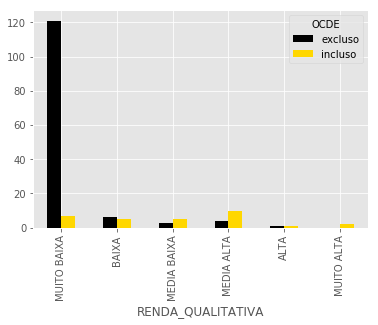

In [367]:

ct1= ctr.plot(kind='bar', color=('black', 'gold'),  legend=True)
ct1

C:\Users\Roberto\.anaconda2\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


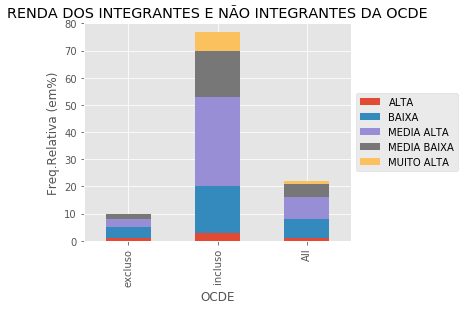

In [368]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

ct2=pd.crosstab(tab.RENDA_QUALITATIVA,tab.OCDE,margins=True,rownames=['RENDA'], colnames=['OCDE']).apply(percConvert, axis=0)
ct2 = ct2.iloc[0:5,:]
plot = ct2.T.plot(kind='bar', stacked=True,title='RENDA DOS INTEGRANTES E NÃO INTEGRANTES DA OCDE')
plot.set_ylim([0, 80])
plt.ylabel('Freq.Relativa (em%)')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Análise dos gráficos:** 

Ao criar uma variavel qualitativa para a renda se tornou mais fácil a observação dos dados da renda dos países de fora e dentro da OCDE, com isso foi possível observar que a renda dos integrantes da organização são na maioria uma renda "média alta" e possuem os dois únicos dois países que possuem uma renda "muito alta". Portanto, a primeira vista os integrantes da OCDE possuem rendas razoáveis cumprindo o objetivo da organização de manter a econômia dos seus países equilibrada.

# Criação de outra variavel qualitativa para desemprego

Para uma melhor relação entre as variaveis a criação de um índice de desemprego qualitativa é necessária.

Para realizar a conversão de uma variavel quantitativa para qualitativa foi utilizado a criação de cinco faixas de valores, para nomear qualitativamente cada uma desses cinco intervalos de desemprego. Onde os intervalos são de:

- MUITO BAIXO: países com índice de desemprego a baixo de 6
- BAIXO: países com índice de desemprego maiores que 6 e menores que 12
- MÉDIO: países com índice de desemprego maiores que 12 e menores que 18
- ALTO: países com índice de desemprego maiores que 18 e menores que 24
- MUITO ALTO: países com índice de desemprego maiores que 24

In [369]:
f2 = range(0,31,6)
dspg_cat = pd.cut(tab['2005_dspg'], bins=f2)
dspg_cat.value_counts(sort=False, normalize=True)*100

(0, 6]      39.130435
(6, 12]     47.826087
(12, 18]     9.782609
(18, 24]     2.173913
(24, 30]     1.086957
Name: 2005_dspg, dtype: float64

In [370]:
tab.loc[(tab['2005_dspg']<6), 'DESEMPREGO_QUALITATIVO']='MUITO BAIXO'
tab.loc[(tab['2005_dspg']>6) & (tab['2005_dspg']<=12), 'DESEMPREGO_QUALITATIVO']='BAIXO'
tab.loc[(tab['2005_dspg']>12) & (tab['2005_dspg']<=18), 'DESEMPREGO_QUALITATIVO']='MEDIO'
tab.loc[(tab['2005_dspg']>18) & (tab['2005_dspg']<=24), 'DESEMPREGO_QUALITATIVO']='ALTO'
tab.loc[(tab['2005_dspg']>24), 'DESEMPREGO_QUALITATIVO']='MUITO ALTO'



tab.head()

,2005_renda,2005_dspg,2005_bln,2005_scd,OCDE,RENDA_QUALITATIVA,DESEMPREGO_QUALITATIVO
country,,,,,,,
Afghanistan,NaN,NaN,0.0000,1600.0,excluso,NaN,NaN
Albania,2500.0,NaN,0.0000,204.0,excluso,MUITO BAIXA,NaN
Algeria,2060.0,15.3,0.0000,1210.0,excluso,MUITO BAIXA,MEDIO
Angola,564.0,NaN,0.0000,980.0,excluso,MUITO BAIXA,NaN
Argentina,3790.0,11.5,0.0253,4470.0,excluso,MUITO BAIXA,BAIXO


# Identificando o desemprego dos países de dentro e fora do OCDE

Utilizando o artifício de cruzamento de variaveis qualitativas foi possível realizar o cruzamento do índice desemprego separado por cinco  intervalos e transformado em qualitativo com os países integrantes e não integrantes da organização OCDE

In [371]:

ct = pd.crosstab(tab.DESEMPREGO_QUALITATIVO, tab.OCDE)
ctq= ct.reindex(["MUITO BAIXO",  "BAIXO", 'MEDIO', 'ALTO', 'MUITO ALTO'])
ctq

OCDE,excluso,incluso
DESEMPREGO_QUALITATIVO,,
MUITO BAIXO,21,15
BAIXO,29,15
MEDIO,8,1
ALTO,2,0
MUITO ALTO,2,0


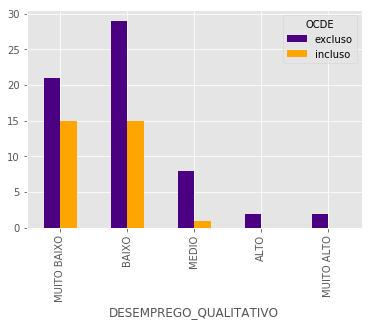

In [372]:
ct2= ctq.plot(kind='bar', color=('indigo', 'orange'),  legend=True)
ct2

C:\Users\Roberto\.anaconda2\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


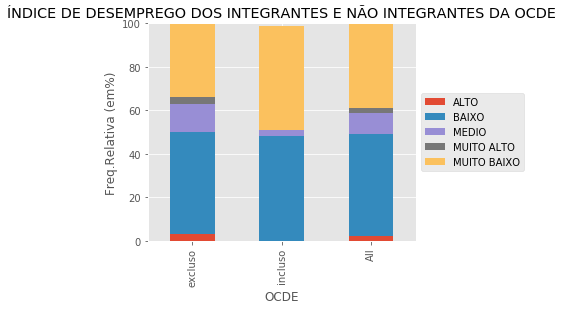

In [373]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

ctq2=pd.crosstab(tab.DESEMPREGO_QUALITATIVO,tab.OCDE,margins=True,rownames=['RENDA'], colnames=['OCDE']).apply(percConvert, axis=0)
ctq2 = ctq2.iloc[0:5,:]
plot = ctq2.T.plot(kind='bar', stacked=True,title='ÍNDICE DE DESEMPREGO DOS INTEGRANTES E NÃO INTEGRANTES DA OCDE')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Análise dos gráficos:**

Como observado na relação da renda dos países de dentro da OCDE e fora, o índice de desemprego também vai a favor ao objetivo da organização na qual seria a redução do índice do desemprego dos participantes.

Já que fica claro que os países integrates da organização possuem na sua maioria um índice de desmprego "muito baixo" ou "baixo", com isso, de acordo com a hipótese levantada os países de dentro da OCDE como possuem uma renda equilibrada e um baixo índice de desemprego deveriam possuir uma quantidade maior de bilionários e menor de suicídios se relacionados aos países de fora da organização.

# Média do índice de bilionários dos integrantes da OCDE

Para observar a diferença dos índices de bilionários de dentro e fora da organização foi realizada uma média do índice de bilionários

In [410]:

tc=tab[tab.OCDE=='incluso'].iloc[:, [4, 2]]
print('A média do índice de bilionários dos países integrantes da OCDE é:', tc.mean())
tc.head()


A média do índice de bilionários dos países integrantes da OCDE é: 2005_bln    0.380794
dtype: float64


,OCDE,2005_bln
country,,
Australia,incluso,0.2990
Austria,incluso,0.4890
Belgium,incluso,0.0965
Canada,incluso,0.5180
Chile,incluso,0.1880


In [411]:

tc2=tab[tab.OCDE=='excluso'].iloc[:, [4, 2]]
print('A média do índice de bilionários dos países não integrantes da OCDE é:', tc2.mean())
tc2.head()

A média do índice de bilionários dos países não integrantes da OCDE é: 2005_bln    0.043341
dtype: float64


,OCDE,2005_bln
country,,
Afghanistan,excluso,0.0000
Albania,excluso,0.0000
Algeria,excluso,0.0000
Angola,excluso,0.0000
Argentina,excluso,0.0253


**Análise dos gráficos**

Observando o índice de bilionários e a média desse índice de acordo com a tabela acima, fica claro que os integrantes da OCDE possuem um grande número de bilionários relacionado aos não integrantes da organização, concluindo a hipótese de que a OCDE realmente preza pelo equilibrio econômico dos seus integrantes, e se um país se tornar integrante desta organização tenderá a possuir uma estabilidade econômica.

# Média dos suicídios dos integrantes da OCDE

Para observar a diferença do número de suicídios de dentro e fora da organização foi realizada uma média do número de suicídios.

In [412]:

tc3=tab[tab.OCDE=='incluso'].iloc[:, [4, 3]]
print('A média do número de suicídios dos países integrantes da OCDE é:', tc3.mean())
tc3.head()

A média do número de suicídios dos países integrantes da OCDE é: 2005_scd    5245.577419
dtype: float64


,OCDE,2005_scd
country,,
Australia,incluso,2430.0
Austria,incluso,1520.0
Belgium,incluso,2250.0
Canada,incluso,4260.0
Chile,incluso,1960.0


In [413]:

tc5=tab[tab.OCDE=='excluso'].iloc[:, [4, 3]]
print('A média do número de suicídios dos países não integrantes da OCDE é:', tc5.mean())
tc5.head()

A média do número de suicídios dos países não integrantes da OCDE é: 2005_scd    4867.4
dtype: float64


,OCDE,2005_scd
country,,
Afghanistan,excluso,1600.0
Albania,excluso,204.0
Algeria,excluso,1210.0
Angola,excluso,980.0
Argentina,excluso,4470.0


**Análise dos gráficos:**

Explicitando as médias do número de suicídios dos países integrantes e não integrantes da OCDE observa-se um contraponto com disrespeito a hipótese levantada previamente, já que a média de suicídios dos integrantes da organização é maior que a dos países de fora do bloco.

Diante disso, levamos em consideração que os suicídios não se relacionam da forma esperada, onde no senso comum um país com uma econômia equilibrada e com um baixo índice de desemprego a hipótese seria de que o número de suicídios diminuiria, já que o país teria "menos motivos" para ter um alto índice de suicídios.

## Conlusão

**Pergunta: Os países que se integraram ao OCDE (Organização para Cooperação e Desenvolvimento Econômico) aumentaram o número de bilionários e dimínuiram o número de suicídios em suas províncias relacionados aos países de fora do bloco?**

De acordo com os dados observados obteve-se uma quebra de expectativa diante da hipótese levantada. Na questão do aumento do índice de bilionários a hipótese foi coerente, onde a média do índice de bilionários entre os integrantes da OCDE foi maior que os não integrantes da organização.

Todavia, no âmbito do número dos suicídios a hipótese não foi coerente contrapondo a hipótese estipulada, na ocasião o número de suicídios entre os integrantes da organização foi enorme e a média desses suiícidios foi maior que a dos países fora do bloco, portanto diante deste ponto de vista não é possível concluir a hipótese levantada.

Então, respondedo a pergunta, os países integrantes da OCDE tendem sim a aumentar o índice de bilionários em seus países, mas por outro lado tendem a aumentar também o número de suicídios em suas províncias relacionados aos países de fora do bloco.

*Um estudo realizado sobre esse paradoxo do aumento do número de suicídios:*https://www.bbc.com/portuguese/ciencia/2011/04/110426_felicidade_suicidio_mv